# House Price Prediction using Machine Learning in Pythonn

### Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("HousePricePrediction.xlsx")
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [2]:
df.shape

(2919, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


### Data Preprocessing

In [4]:
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)
print("Categorical Column: ",len(obj_cols))

int_ = (df.dtypes == 'int64')
int_cols = list(int_[int_].index)
print("Integer Column: ", len(int_cols))

float_ = (df.dtypes == 'float64')
float_cols = list(float_[float_].index)
print("Float Column: ", len(float_cols))

Categorical Column:  4
Integer Column:  6
Float Column:  3


### Exploratory Data Analysis

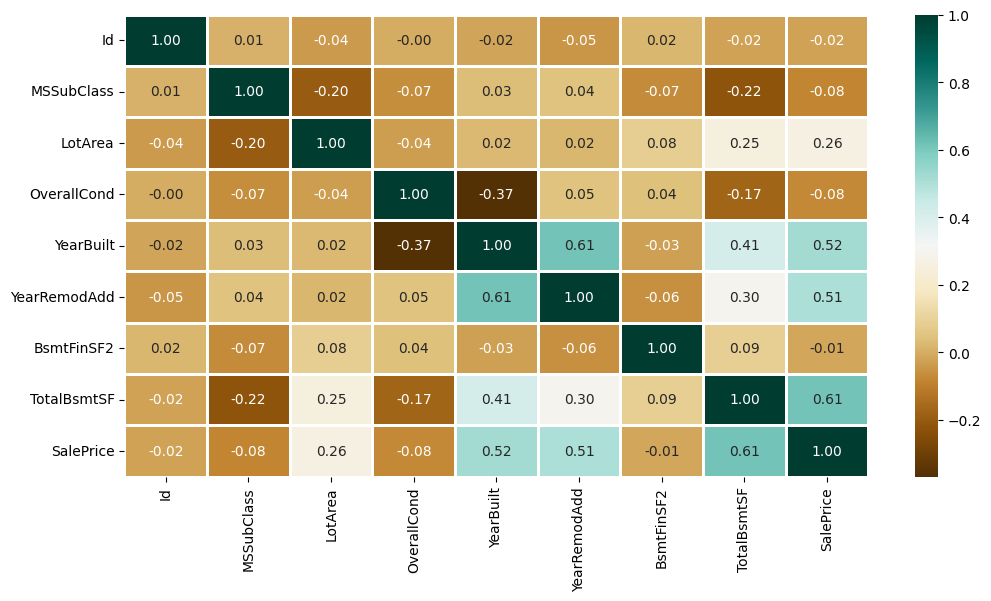

In [5]:
#Select only numerical data for correlation analysis
numerical_dataset = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(), cmap='BrBG', fmt='.2f', annot=True, linewidths=2)
#sns.heatmap(numerical_dataset.corr(), cmap='coolwarm', fmt='.2f', annot=True, linewidths=2)
#sns.heatmap(numerical_dataset.corr(), cmap='viridis', fmt='.2f', annot=True, linewidths=2)
#sns.heatmap(numerical_dataset.corr(), cmap='plasma', fmt='.2f', annot=True, linewidths=2)
plt.show()

### To analyze the different categorical features. Let’s draw the barplot.

In [6]:
obj_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [7]:
unique_cols = []
for col in obj_cols:
    unique_cols.append(df[col].unique())
unique_cols

[array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object),
 array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object),
 array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
        'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
        'Stone', 'ImStucc', 'CBlock', nan], dtype=object)]

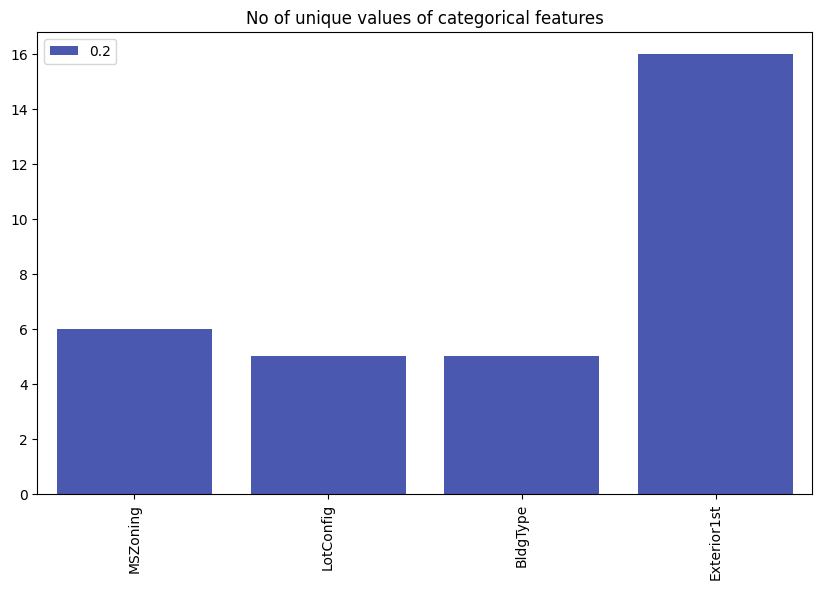

In [8]:
unique_values = []
for col in obj_cols:
    unique_values.append(df[col].unique().size)
#unique_values
plt.figure(figsize=(10, 6))
plt.title("No of unique values of categorical features")
plt.xticks(rotation=90)
sns.barplot(x=obj_cols, y=unique_values, hue=0.2, palette="coolwarm")
plt.show()

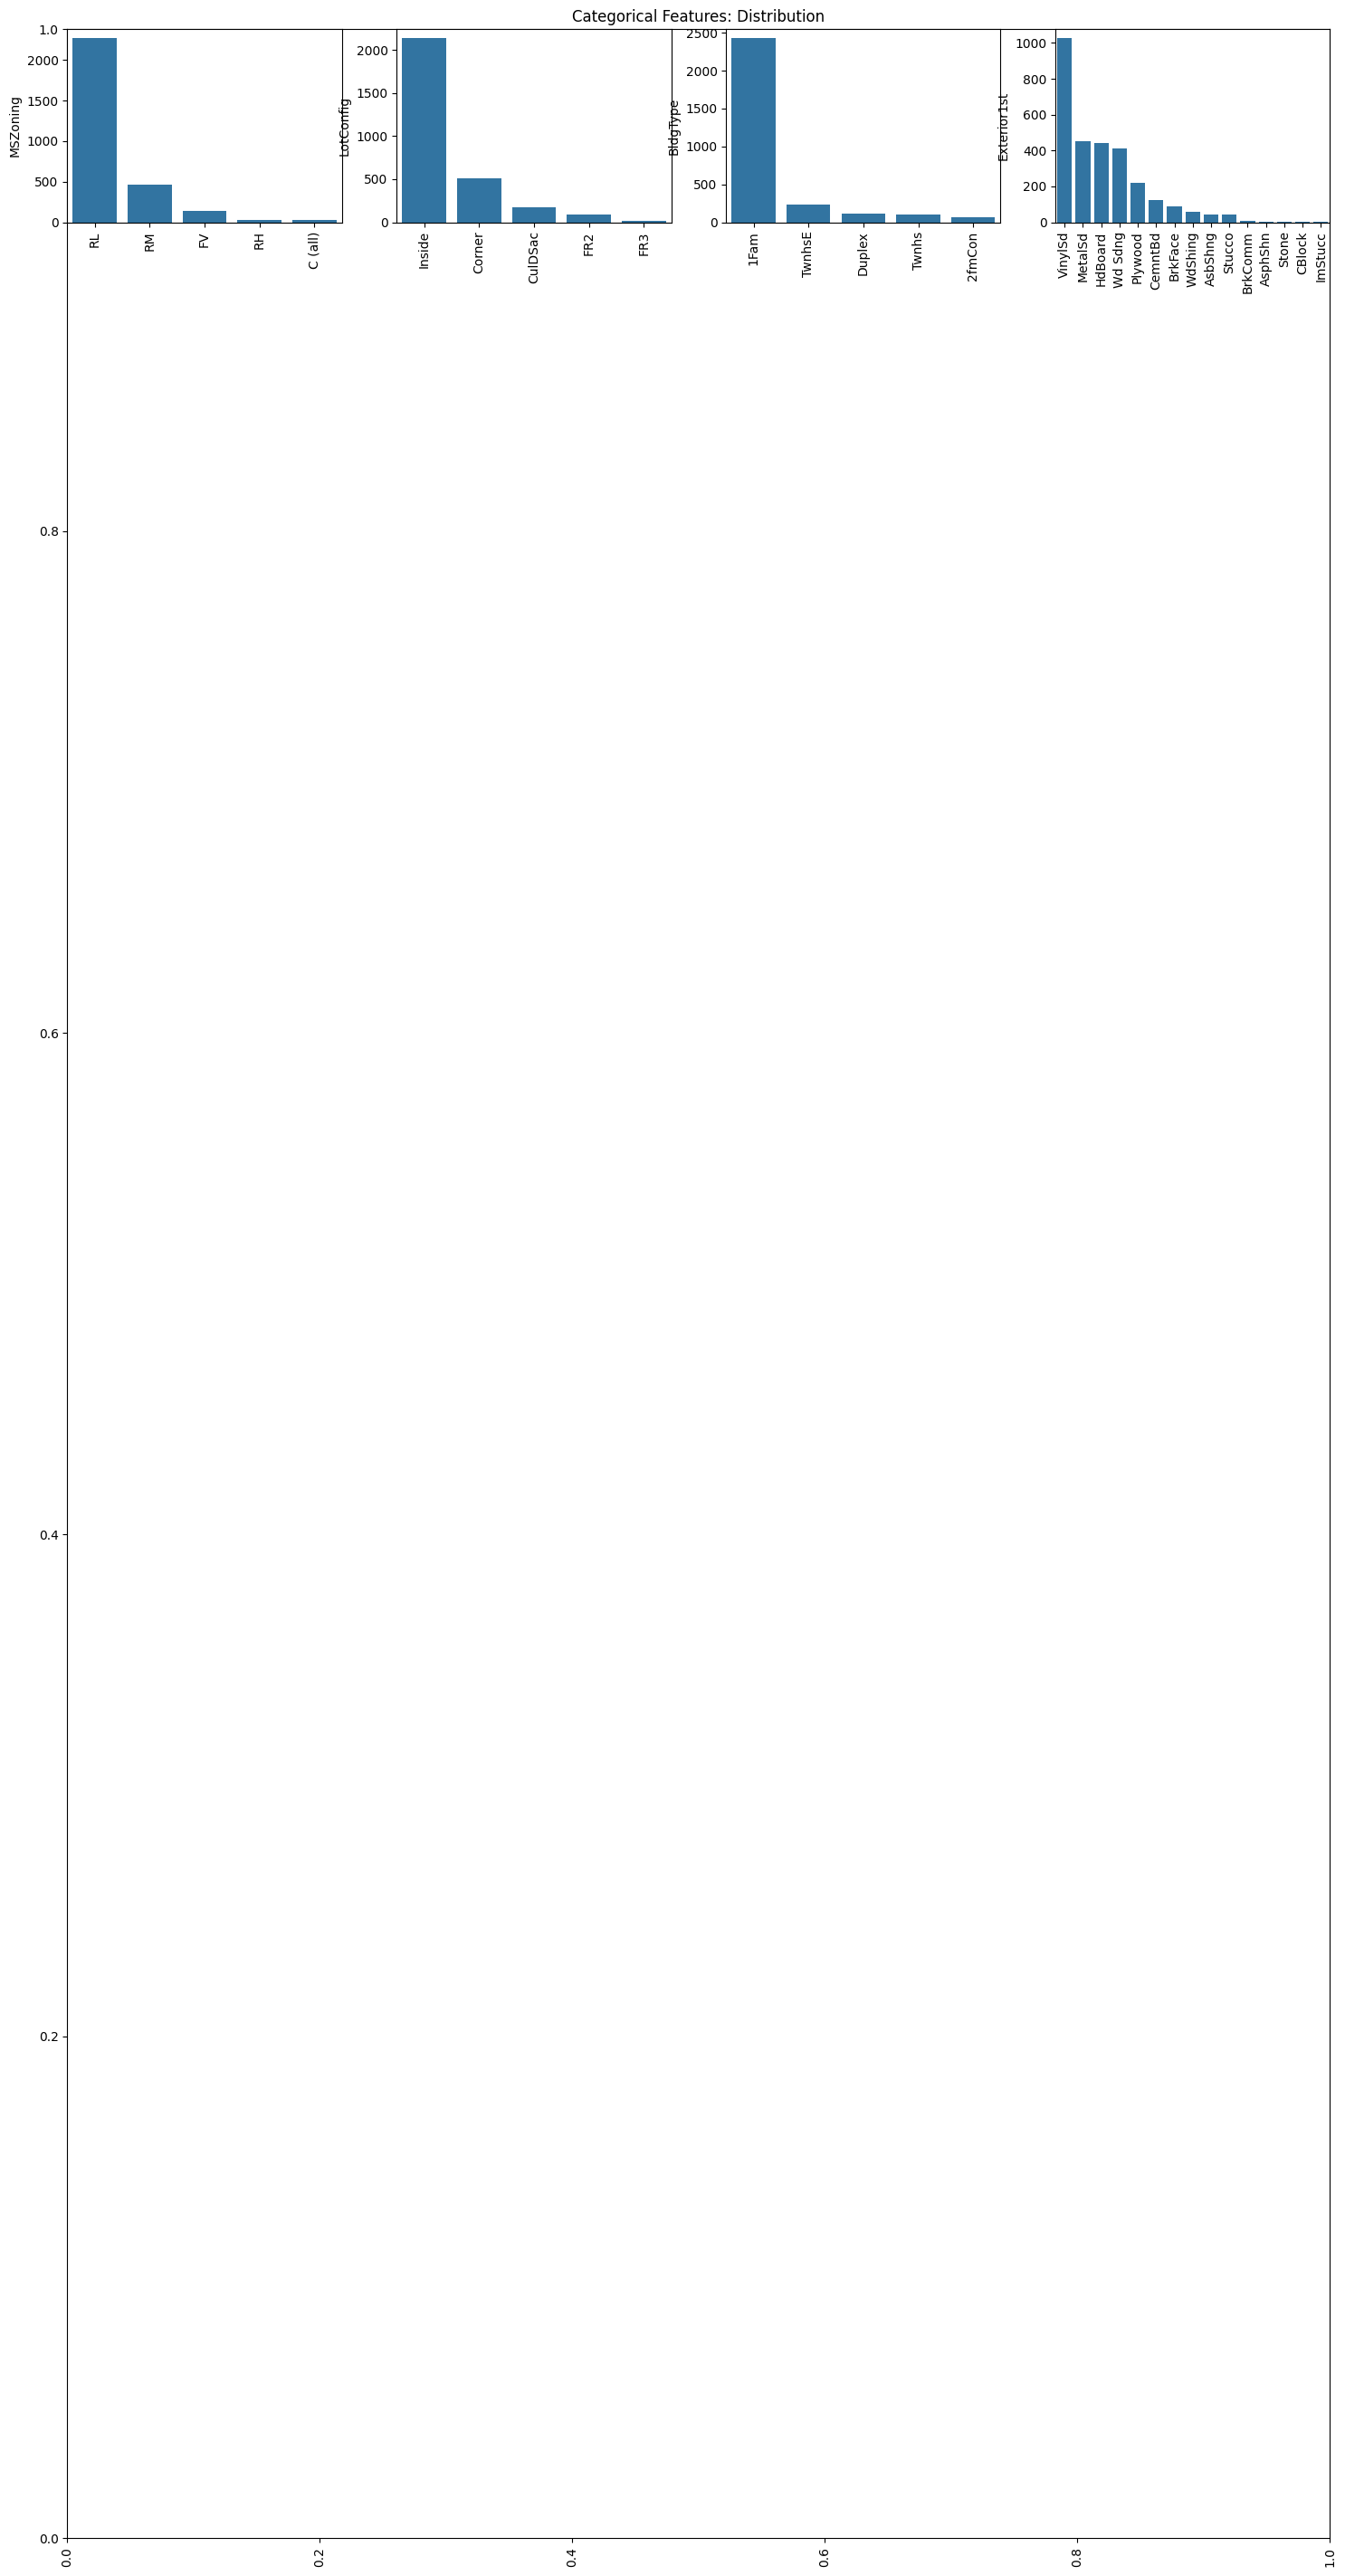

In [9]:
plt.figure(figsize=(18, 36))
plt.title("Categorical Features: Distribution")
plt.xticks(rotation=90)
index = 1
for col in obj_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


### Data Cleaning

In [10]:
df.drop(['Id'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [13]:
df['SalePrice'] = df['SalePrice'].fillna(
    df['SalePrice'].mean()
)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     2919 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [15]:
new_df = df.dropna()

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


In [18]:
new_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### OneHotEncoder – For Label categorical features

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
obj_type = (new_df.dtypes == 'object')
obj_columns = list(obj_type[obj_type].index)
print("Categorical Features:")
print(obj_columns)
print("No of Categorical Features: ", len(obj_columns))

Categorical Features:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No of Categorical Features:  4


In [30]:
OH_encoders = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_encoders

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [31]:
OH_cols = pd.DataFrame(OH_encoders.fit_transform(new_df[obj_columns]))
OH_cols

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
OH_cols.index = new_df.index

In [34]:
OH_cols

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
OH_cols.columns = OH_encoders.get_feature_names_out()
OH_cols

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


In [37]:
df_finals = new_df.drop(obj_columns, axis=1)
df_finals

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.00000
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000
2,60,11250,5,2001,2002,0.0,920.0,223500.00000
3,70,9550,5,1915,1970,0.0,756.0,140000.00000
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589


In [38]:
df_finals = pd.concat([df_finals, OH_cols], axis=1)
df_finals

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_finals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           2913 non-null   int64  
 1   LotArea              2913 non-null   int64  
 2   OverallCond          2913 non-null   int64  
 3   YearBuilt            2913 non-null   int64  
 4   YearRemodAdd         2913 non-null   int64  
 5   BsmtFinSF2           2913 non-null   float64
 6   TotalBsmtSF          2913 non-null   float64
 7   SalePrice            2913 non-null   float64
 8   MSZoning_C (all)     2913 non-null   float64
 9   MSZoning_FV          2913 non-null   float64
 10  MSZoning_RH          2913 non-null   float64
 11  MSZoning_RL          2913 non-null   float64
 12  MSZoning_RM          2913 non-null   float64
 13  LotConfig_Corner     2913 non-null   float64
 14  LotConfig_CulDSac    2913 non-null   float64
 15  LotConfig_FR2        2913 non-null   f

### Splitting Dataset into Training and Testing

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_finals.drop(["SalePrice"], axis=1)
Y = df_finals["SalePrice"]

In [44]:
# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0
)

### Model and Accuraccy

### As we have to train the model to determine the continuous values, so we will be using these regression models.
* Support Vector Machine,
* Random Forest Regressor,
* Linear Regressor

### Support Vector Machine. Machine

In [48]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print("Mean Absolute Percentage Error for SVR: ", mean_absolute_percentage_error(Y_valid, Y_pred))

Mean Absolute Percentage Error for SVR:  0.1870512931870423


### Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print("Mean Absolute Percentage Error for RFR: ", mean_absolute_percentage_error(Y_valid, Y_pred))

Mean Absolute Percentage Error for RFR:  0.19055130027731565


### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print("Mean Absolute Percentage Error for LR: ", mean_absolute_percentage_error(Y_valid, Y_pred))

Mean Absolute Percentage Error for LR:  0.18741683841600162


### Catboost Classifier

In [53]:
pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 640.0 kB/s eta 0:02:39
   ---------------------------------------- 0.0/101.7 MB 640.0 kB/s eta 0:02:39
   ---------------------------------------- 0.0/101.7 MB 640.0 kB/s eta 0:02:39
   ---------------------------------------- 0.1/101.7 MB 435.7 kB/s eta 0:03:54
   ---------------------------------------- 0.1/101.7 MB 514.3 kB/s eta 0:03:18
   ---------------------------------------- 0.2/101.7 MB 610.0 kB/s eta 0:02:47
   ---------------------------------------- 0.2/101.7 MB 689.6 kB/s eta 0:02:28
   ---------------------------------------- 0.3/101.7 MB 883.3 kB/s eta 0:01:55
   ---------------------------------------- 0.5/101.7 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.6/101.7 MB 1.3 MB/s eta 0:01:21
   ---------------------------------------- 0.6/101.7 MB 1.4 M

In [57]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [58]:
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score = r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 115ms	remaining: 1m 54s
1:	learn: 55780.1567575	total: 119ms	remaining: 59.5s
2:	learn: 55060.9599505	total: 123ms	remaining: 40.8s
3:	learn: 54456.1126921	total: 126ms	remaining: 31.4s
4:	learn: 53901.1464265	total: 130ms	remaining: 25.8s
5:	learn: 53334.6062357	total: 133ms	remaining: 22s
6:	learn: 52824.4943646	total: 136ms	remaining: 19.3s
7:	learn: 52381.4267520	total: 139ms	remaining: 17.3s
8:	learn: 51841.0364316	total: 142ms	remaining: 15.6s
9:	learn: 51281.5852560	total: 145ms	remaining: 14.4s
10:	learn: 50825.3817438	total: 149ms	remaining: 13.4s
11:	learn: 50477.2609796	total: 153ms	remaining: 12.6s
12:	learn: 50081.4097641	total: 157ms	remaining: 11.9s
13:	learn: 49663.6380360	total: 161ms	remaining: 11.3s
14:	learn: 49334.5782662	total: 164ms	remaining: 10.8s
15:	learn: 48967.5221026	total: 169ms	remaining: 10.4s
16:	learn: 48676.4063222	total: 173ms	remaining: 10s
17:	learn: 48359.1169955	total: 179ms	remaining:

0.38351169878113034